In [2]:
from datetime import datetime as dt
from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

COLORS_7 = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']

from analsis.analsis_utils.plot_utils import plot_all_num_features_models, \
    plot_loss_and_r2s_for_selected_feature_numbers, \
    plot_num_features_vs_r2, plot_bar_plot_of_used_features, plot_r2_vs_num_features, \
    plot_double_bar_plot_of_used_features_different_algos, plot_num_uses_global_local
from analsis.analsis_utils.utils import collect_num_uses_different_exp, prepare_data_of_used_features


In [3]:

base_path = '/Volumes/noamaz/modularity/teach_archs'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
num_features = 5

In [6]:
retina_base_path = f"{base_path}/retina/retina_feature_selection/teach_archs_regression_feature_selection_results"
xor_base_path = f"{base_path}/xor/xor_feature_selection/teach_archs_regression_feature_selection_results"
digit_base_path = f"{base_path}/digits/digits_feature_selection/teach_archs_regression_feature_selection_results"

retina_nn = f'{retina_base_path}/retina_2023-08-01-15-57-58_lr_0.001_bs_512_output_meta_only_5_features_motifs_count_density_entropy.csv'
retina_lgb = f'{retina_base_path}/retina_2023-08-01-16-54-23_lightgbm__motifs_count_density_entropy.csv'

xor_nn = f'{xor_base_path}/xor_2023-08-01-16-24-25_lr_0.001_bs_512_output_meta_only_5_features_motifs_count_density_entropy.csv'
xor_lgb = f'{xor_base_path}/xor_2023-08-01-16-56-58_lightgbm__motifs_count_density_entropy.csv'

digits_nn = f'{digit_base_path}/digits_2023-08-01-16-30-38_lr_0.001_bs_512_output_meta_only_5_features_motifs_count_density_entropy.csv'
digits_lgb = f'{digit_base_path}/digits_2023-08-01-16-57-55_lightgbm__motifs_count_density_entropy.csv'

In [14]:
names = ['retina_lgb', 'retina_nn', 'xor_lgb', 'xor_nn', 'digits_lgb', 'digits_nn']
res = []
for csv_path in [retina_lgb, retina_nn, xor_lgb, xor_nn, digits_lgb, digits_nn]:
    res.append(pd.read_csv(csv_path))

In [15]:
for i in range(len(res)):
    print(f"{names[i]}: {res[i]['r2s test'].iloc[-1]}")

retina_lgb: 0.9095722788867672
retina_nn: 0.9119226
xor_lgb: 0.9709664467042628
xor_nn: 0.9565623
digits_lgb: 0.9931861727072252
digits_nn: 0.958918


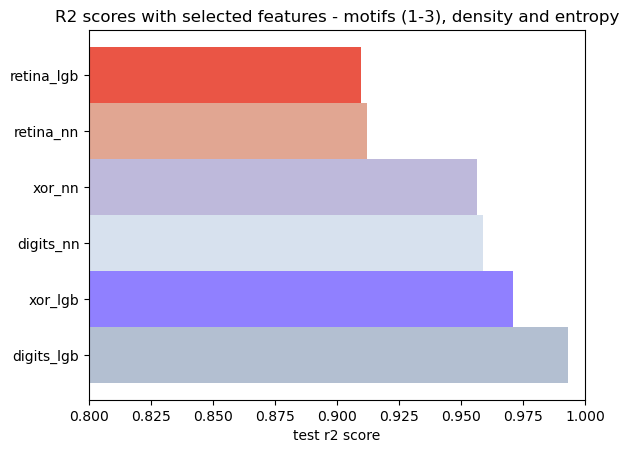

In [65]:
plt.figure()
bar_size = 0.15
padding = 0.30
locs =[ (i * bar_size) + padding for i in range(len(names))]
reses = [res[i]['r2s test'].iloc[-1] for i in range(len(names))]
sorted_vals = [(x, y) for x, y in sorted(zip(reses, names), reverse=True)]
sage = ["#7d8f69", "#a9af7e", "#557153", ]
grays = ["#b3bfd1", "#d7e1ee", "#54504c"]

rads = ["#ea5545", "#e1a692", "#b30000", ]
purples = ["#9080ff", "#beb9db", "#5e569b"]
colors = [ grays[0], purples[0], grays[1], purples[1] , rads[1], rads[0]]
for i in range(len(locs)):
    plt.barh(locs[i], sorted_vals[i][0], label=sorted_vals[i][1], height=bar_size,
               color=colors[i]  )
plt.xlabel('test r2 score')
plt.yticks(
            ticks=locs,
            labels=[y for x,y, in sorted_vals],
        )
plt.xlim(
      0.8, 1
    )
plt.title('R2 scores with selected features - motifs (1-3), density and entropy')
plt.savefig(
            f"{local_base_path}/plots/top_features/r2_chosen_top_5_feature_analsis.png")


In [47]:
sorted_vals

[(0.9931861727072252, 'digits_lgb'),
 (0.9709664467042628, 'xor_lgb'),
 (0.958918, 'digits_nn'),
 (0.9565623, 'xor_nn'),
 (0.9119226, 'retina_nn'),
 (0.9095722788867672, 'retina_lgb')]

In [ ]:
for i in range(len(names)):
    loc = y_locs + (i * bar_size)
    plt.barh(y_locs + (i * bar_size), res[i]['r2s test'].iloc[-1], height=bar_size,
             label=names[i])
    locs.append(loc)

In [38]:
locs

[0.3, 0.44999999999999996, 0.6, 0.75, 0.8999999999999999, 1.05]